In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set Up Import Libraries

In [3]:
# Install any missing libraries
!pip install -q scikit-learn pandas matplotlib


# Import Libraries and Define Helper Functions

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and Preprocess the Data

In [7]:
# Define paths and parameters
# Update this path to your actual path to the mango leaf dataset within your Google Drive
data_dir = '/content/drive/MyDrive/Lab 01 Task/MangoLeafBD Dataset'
img_size = (240, 320)

# Preprocess images and labels
def load_images_and_labels(data_dir, img_size):
    labels = []
    images = []

    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(category)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the images and labels
images, labels = load_images_and_labels(data_dir, img_size)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Prepare the Data for Training

In [8]:
# Flatten images
X = images.reshape(images.shape[0], -1)
y = labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate the Decision Tree and Random Forest Classifiers

Decision Tree Classifier

In [9]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.6975
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61        90
           1       0.81      0.79      0.80       112
           2       0.92      0.99      0.95        91
           3       0.87      0.87      0.87       104
           4       0.55      0.58      0.57       101
           5       0.60      0.63      0.62        93
           6       0.58      0.50      0.54        86
           7       0.62      0.59      0.61       123

    accuracy                           0.70       800
   macro avg       0.69      0.70      0.69       800
weighted avg       0.70      0.70      0.70       800

Confusion Matrix for Decision Tree:
 [[56  6  3  5 10  1  2  7]
 [11 88  0  1  6  2  0  4]
 [ 0  0 90  1  0  0  0  0]
 [ 5  2  4 90  1  0  2  0]
 [ 7  5  0  3 59 10  7 10]
 [ 3  2  1  0 10 59  8 10]
 [ 4  1  0  2  8 14 43 14]
 [ 7  5  0  1 13 12 12 73]]


Random Forest Classifier

In [10]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.885
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        90
           1       0.87      0.91      0.89       112
           2       0.98      1.00      0.99        91
           3       0.99      0.93      0.96       104
           4       0.79      0.81      0.80       101
           5       0.89      0.88      0.89        93
           6       0.87      0.85      0.86        86
           7       0.82      0.80      0.81       123

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Confusion Matrix for Random Forest:
 [[ 83   1   1   1   3   0   0   1]
 [  2 102   0   0   5   0   0   3]
 [  0   0  91   0   0   0   0   0]
 [  2   4   1  97   0   0   0   0]
 [  1   8   0   0  82   4   4   2]
 [  0   0   0   0   3  82   1   7]
 [  1   1   0   0  

# Visualize Results

In [12]:
import seaborn as sns

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


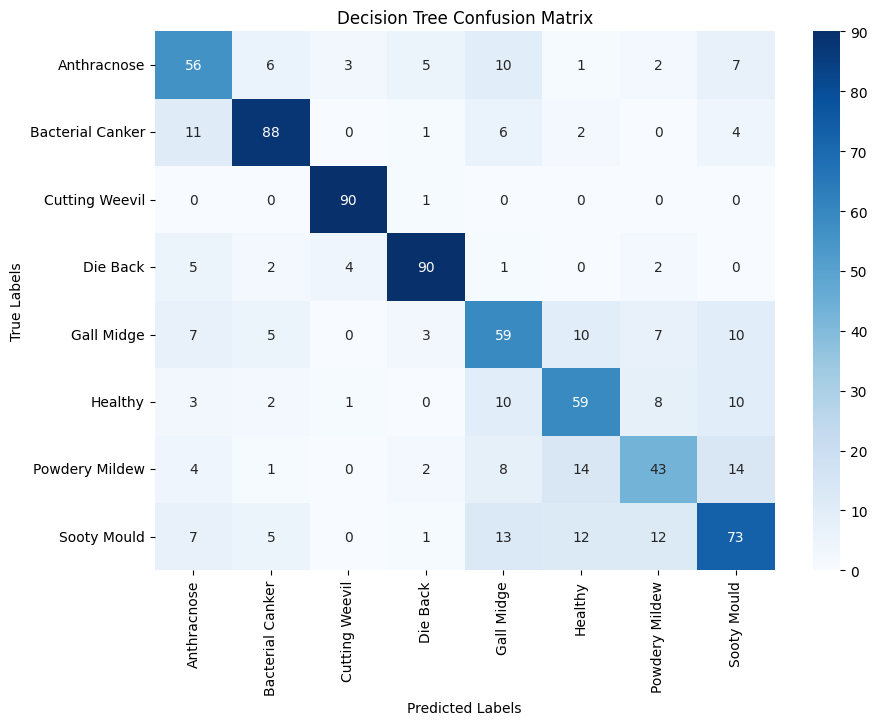

In [13]:
# Plot confusion matrix for Decision Tree
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), le.classes_, "Decision Tree Confusion Matrix")


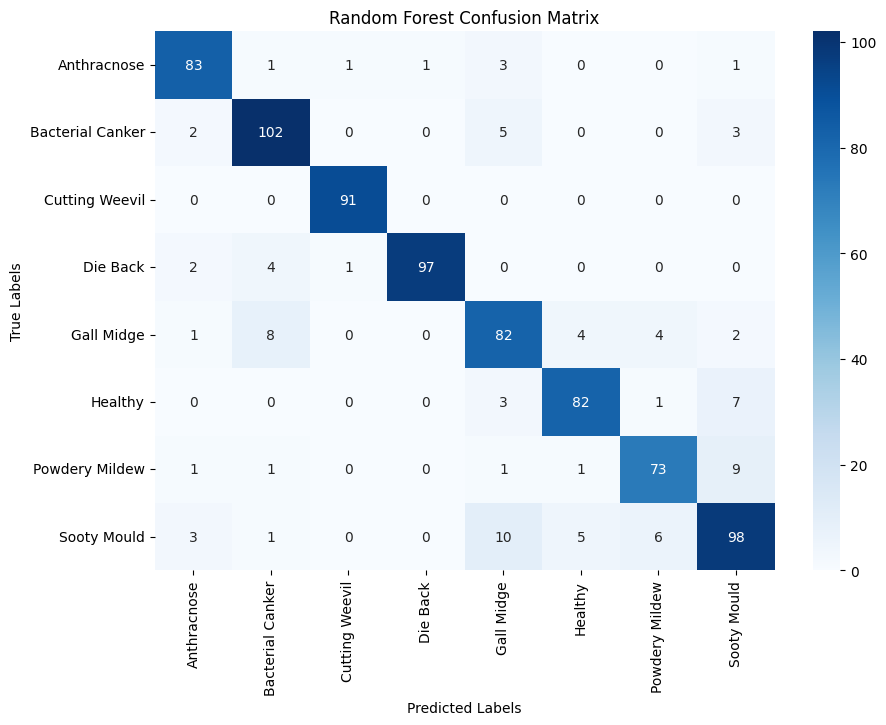

In [14]:

# Plot confusion matrix for Random Forest
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), le.classes_, "Random Forest Confusion Matrix")